In [26]:
import librosa
import librosa.display
from scipy import signal
from scipy import misc
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import audioread

from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *

In [27]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLING RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [28]:
def load_audio(clip_path):
    ''' takes a clip path and returns the audio'''
    y, sr = librosa.load(clip_path, sr=12000)
    return y

In [29]:
def spectrogram(y):
    ''' takes an audio clip, transforms it, and displays
        the spectrogram and the transformed audio clip'''
    S = np.abs(librosa.stft(y))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max), x_axis='time', ax=ax)
    plt.title("Piha audio clip")
    plt.ylabel("Frequency (0-6kHz)")
    return S

In [30]:
def template(y):
    ''' takes an audio clip (transformed), selects a portion to
        create the template, and returns the template'''
    template = np.abs(librosa.stft(y[15000:40000]))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(template,ref=np.max),x_axis='time',ax=ax)
    plt.title("Piha Template")
    plt.ylabel("Frequency (0-6kHz)")
    return template

In [31]:
def correlation(clip, clip_path, S, template, y):
    ''' takes the path of the audio clip, the transformed audio
        clip, and the template to perform the cross-correlation
        to display the local_score_visualization, and returns
        the dataframe'''
    isolation_parameters = {
        "technique" : "steinberg",
        "threshold_type" : "median",
        "threshold_const" : 2.0,
        "threshold_min" : 0.0,
        "bi_directional_jump" : 0.05,
        "window_size" : 1.0
    }

    corr = signal.correlate2d(S,template,boundary='symm',mode='same')
    corr_reduced_max = np.amax(corr,axis=0)
    local_score = corr_reduced_max/max(corr_reduced_max)

    test_df = steinberg_isolate(corr_reduced_max/max(corr_reduced_max),y,12000,"test_dir","test_file",isolation_parameters)
    local_score_visualization(local_score, clip_path, premade_annotations_df = manual_df[manual_df['IN FILE'] == clip], automated_df = test_df)
    return test_df

### Template

In [32]:
piha1 = load_audio('data/test/ScreamingPiha1.wav')
piha1

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -7.6130964e-06,  1.3362171e-05,  3.2501273e-05], dtype=float32)

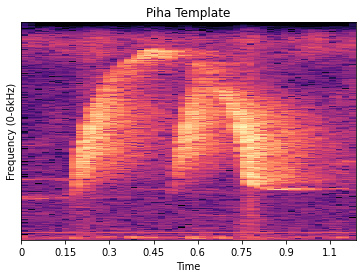

In [33]:
temp = template(piha1)

### Screaming 2

In [34]:
path2 = 'data/test/ScreamingPiha2.wav'
piha2 = load_audio(path2)
piha2

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

array([[1.3257694e+00, 2.4991512e+00, 1.8887196e+00, ..., 1.0712575e-01,
        4.9178953e+00, 4.5990777e+00],
       [6.6982079e-01, 3.1457748e+00, 6.2937026e+00, ..., 3.8763504e+00,
        5.7982445e+00, 2.4185183e+00],
       [5.5235493e-01, 3.1872294e+00, 7.9808388e+00, ..., 3.2215829e+00,
        5.6444893e+00, 3.2969782e+00],
       ...,
       [5.9118793e-05, 1.5429613e-04, 1.7771986e-04, ..., 2.1640344e-04,
        2.2434338e-04, 3.6801473e-04],
       [3.0692368e-05, 1.4198643e-04, 2.0672099e-04, ..., 1.8170406e-04,
        2.2292405e-04, 1.5088491e-04],
       [8.2429942e-05, 1.1030043e-04, 6.3332125e-05, ..., 2.1082326e-04,
        3.6782178e-04, 3.5819004e-04]], dtype=float32)

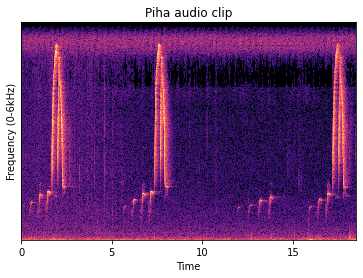

In [35]:
spect2 = spectrogram(piha2)
spect2

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID
0,test_dir,test_file,0,33.933083,12000,1.629167,3.767917,bird
1,test_dir,test_file,0,33.933083,12000,12.232417,3.512417,bird
2,test_dir,test_file,0,33.933083,12000,30.543250,3.256917,bird


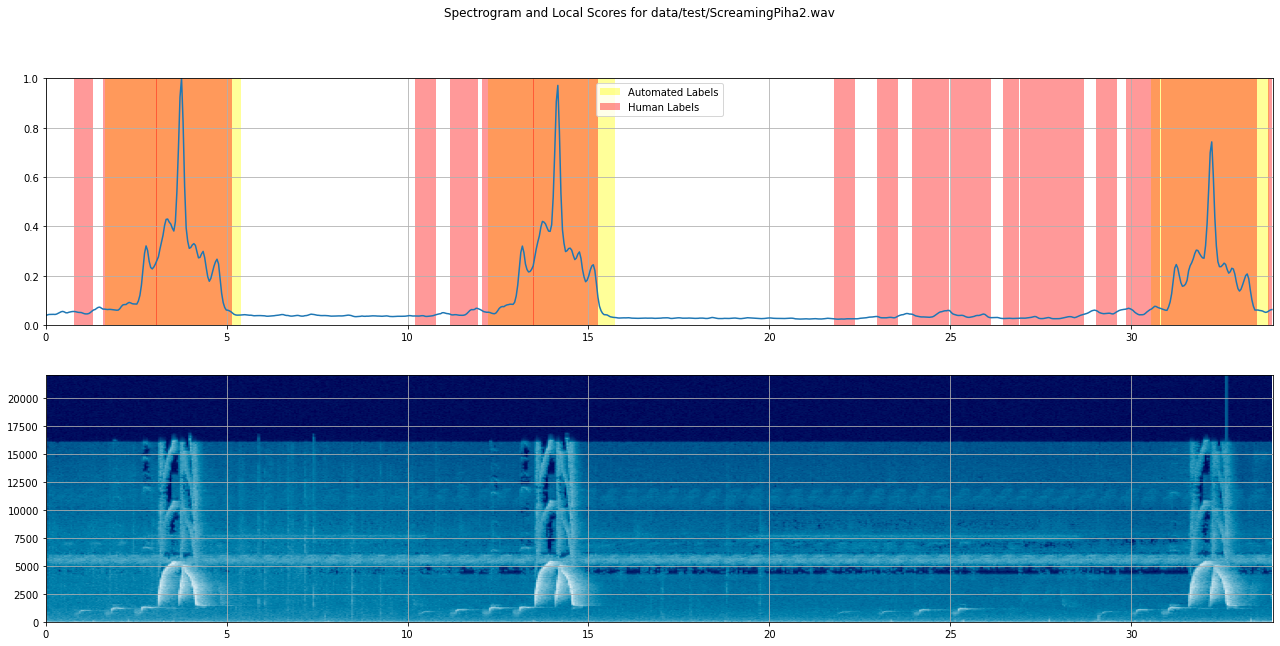

In [37]:
corr = correlation('ScreamingPiha2.wav', path2, spect2, temp, piha2)
corr

### Screaming 3

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID
0,test_dir,test_file,0,6.844083,12000,2.7725,3.7625,bird


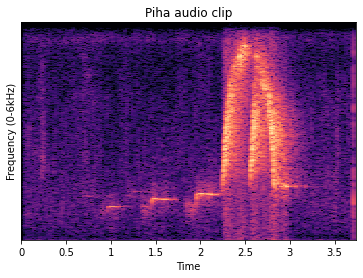

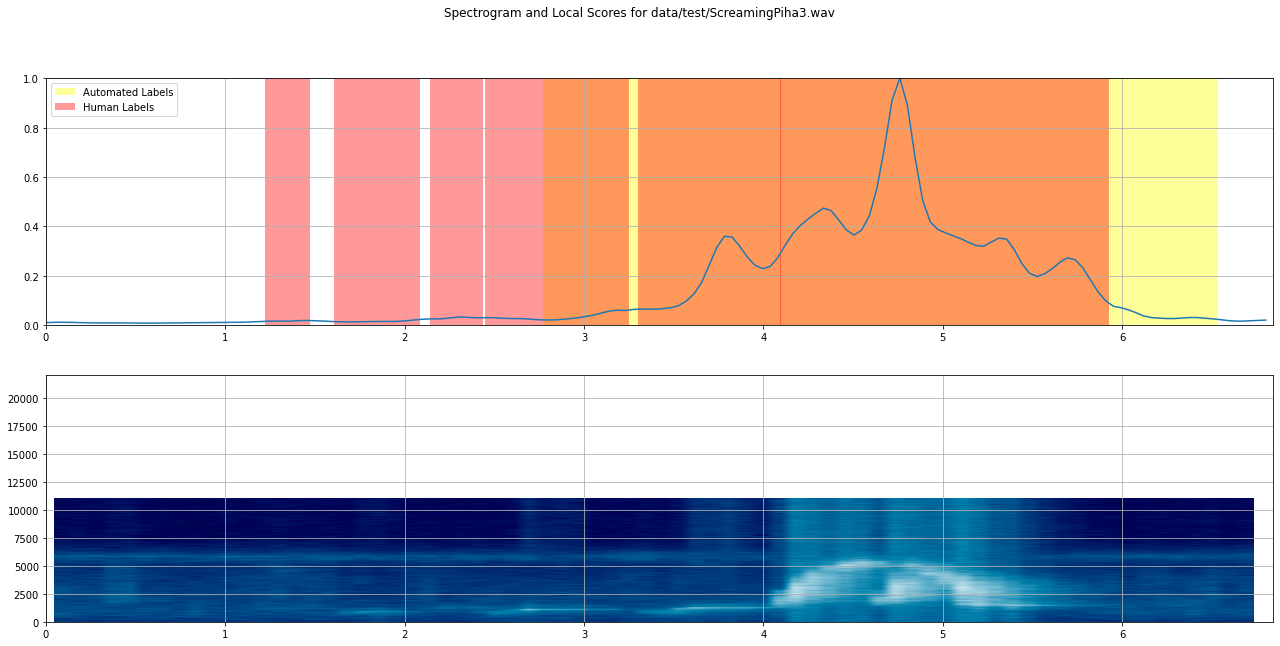

In [12]:
path3 = 'data/test/ScreamingPiha3.wav'
piha3 = load_audio(path3)
spect3 = spectrogram(piha3)

correlation('ScreamingPiha3.wav', path3, spect3, temp, piha3)

### Screaming 4

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID
0,test_dir,test_file,0,13.557583,12000,0.607167,1.212917,bird
1,test_dir,test_file,0,13.557583,12000,3.502833,1.000000,bird
2,test_dir,test_file,0,13.557583,12000,9.421917,3.044000,bird


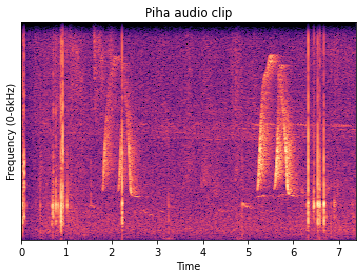

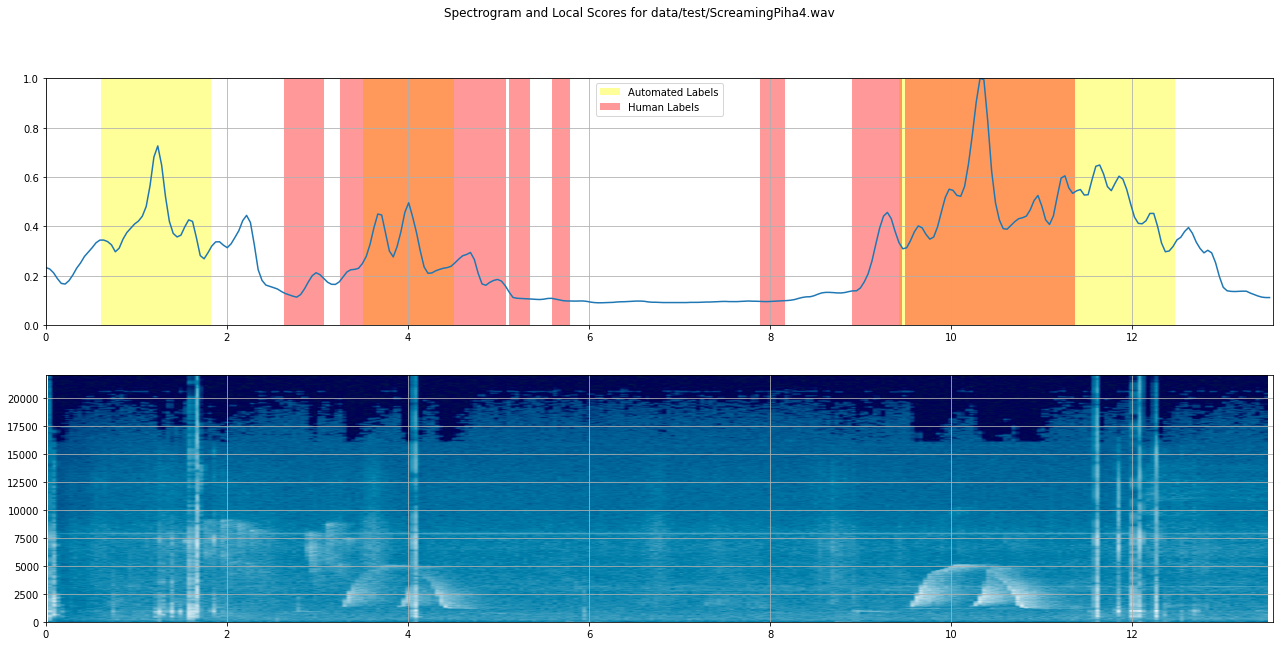

In [14]:
path4 = 'data/test/ScreamingPiha4.wav'
piha4 = load_audio(path4)
spect4 = spectrogram(piha4)

correlation('ScreamingPiha4.wav', path4, spect4, temp, piha4)

### Screaming 5

In [ ]:
path5 = 'data/test/ScreamingPiha5.wav'
piha5 = load_audio(path5)
spect5 = spectrogram(piha5)

correlation(path5, spect5, temp, piha5)

### Screaming 6

In [ ]:
path6 = 'data/test/ScreamingPiha6.wav'
piha6 = load_audio(path6)
spect6 = spectrogram(piha6)

correlation(path6, spect6, temp, piha6)

### Screaming 7

In [ ]:
path7 = 'data/test/ScreamingPiha7.wav'
piha7 = load_audio(path7)
spect7 = spectrogram(piha7)

correlation(path7, spect7, temp, piha7)

### Screaming 8

In [ ]:
path8 = 'data/test/ScreamingPiha8.wav'
piha8 = load_audio(path8)
spect8 = spectrogram(piha8)

correlation(path8, spect8, temp, piha8)

### Screaming 9

In [ ]:
path9 = 'data/test/ScreamingPiha9.wav'
piha9 = load_audio(path9)
spect9 = spectrogram(piha9)

correlation(path9, spect9, temp, piha9)

### Screaming 10

In [ ]:
path10 = 'data/test/ScreamingPiha10.wav'
piha10 = load_audio(path10)
spect10 = spectrogram(piha10)

correlation(path10, spect10, temp, piha10)

### Screaming 11

In [ ]:
path11 = 'data/test/ScreamingPiha11.wav'
piha11 = load_audio(path11)
spect11 = spectrogram(piha11)

correlation(path11, spect11, temp, piha11)